In [2]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [8]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [3]:
np.eye(5)[1]

array([0., 1., 0., 0., 0.])

In [7]:
REBUILD_DATA = False # set to true to one once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f) #used to read in the data
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) # convert to grayscale
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE)) #resize
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])
                        
                        # To see balance
                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

  0%|▏                                                                             | 30/12501 [00:00<00:41, 297.21it/s]

PetImages/Cat


  0%|▎                                                                             | 46/12501 [00:00<00:27, 455.79it/s]

PetImages/Dog


100%|███████████████████████████████████████████████████████████████████████████| 12501/12501 [00:24<00:00, 501.92it/s]


Cats: 12476
Dogs: 12470


In [11]:
training_data = np.load('training_data.npy', allow_pickle = True)

In [12]:
print(len(training_data))

24946


In [14]:
print(training_data[1])

[array([[173, 146, 170, ...,  85,  73, 107],
       [174, 152, 174, ...,  94,  80,  74],
       [172, 156, 175, ...,  86,  83,  77],
       ...,
       [176, 188, 178, ..., 111, 109, 105],
       [160, 169, 172, ..., 110, 114, 107],
       [170, 178, 175, ..., 110, 113, 101]], dtype=uint8)
 array([0., 1.])]


In [15]:
import matplotlib.pyplot as plt

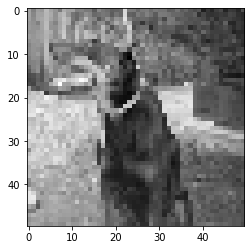

In [19]:
plt.imshow(training_data[1][0], cmap = 'gray')
plt.show()

In [20]:
pip install jupyterthemes

Note: you may need to restart the kernel to use updated packages.


In [23]:
! jt -t monokai